In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from ipywidgets import interact, IntSlider

cmap = 'seismic'
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('/Users/konansul/Desktop/course-ml/DATA/gene_expression.csv')

In [3]:
data

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [26]:
data['Cancer Present'].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

<Axes: xlabel='Gene One', ylabel='Gene Two'>

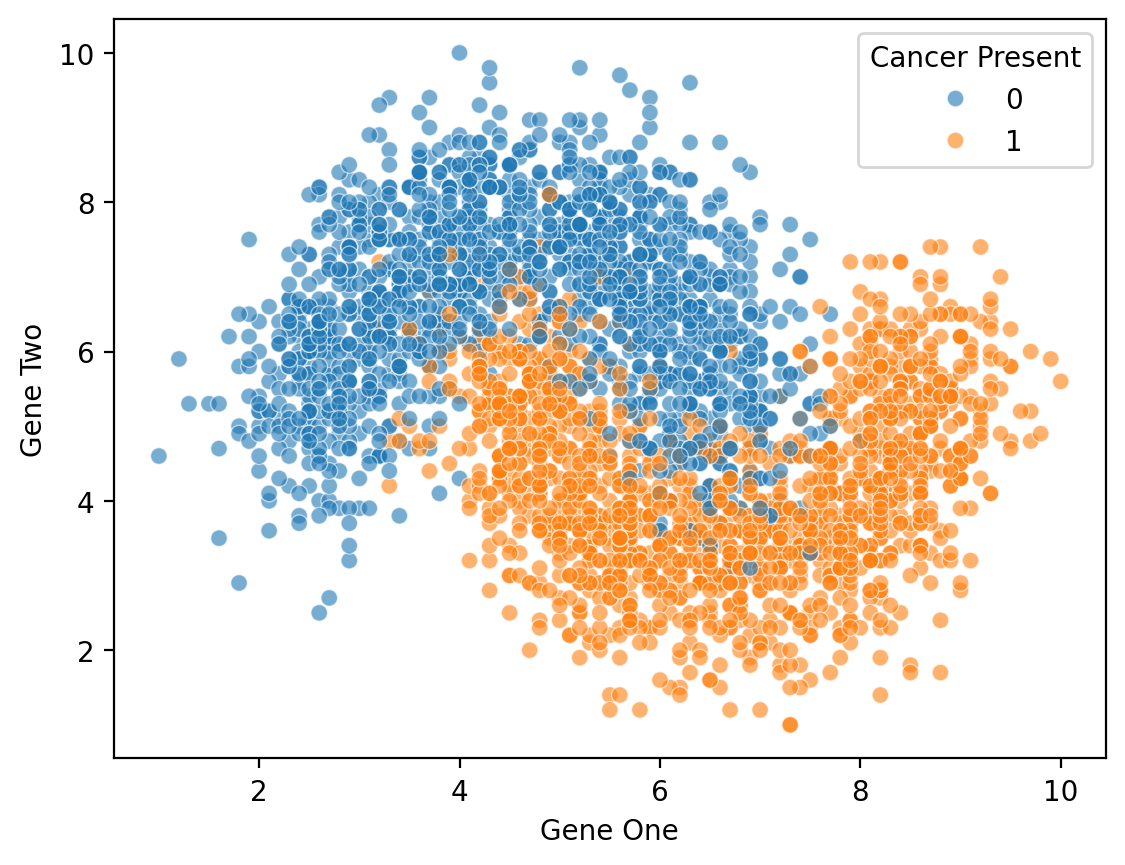

In [4]:
sns.scatterplot(x = 'Gene One', y = 'Gene Two', hue = 'Cancer Present', data = data, alpha = 0.6)

(4.0, 8.0)

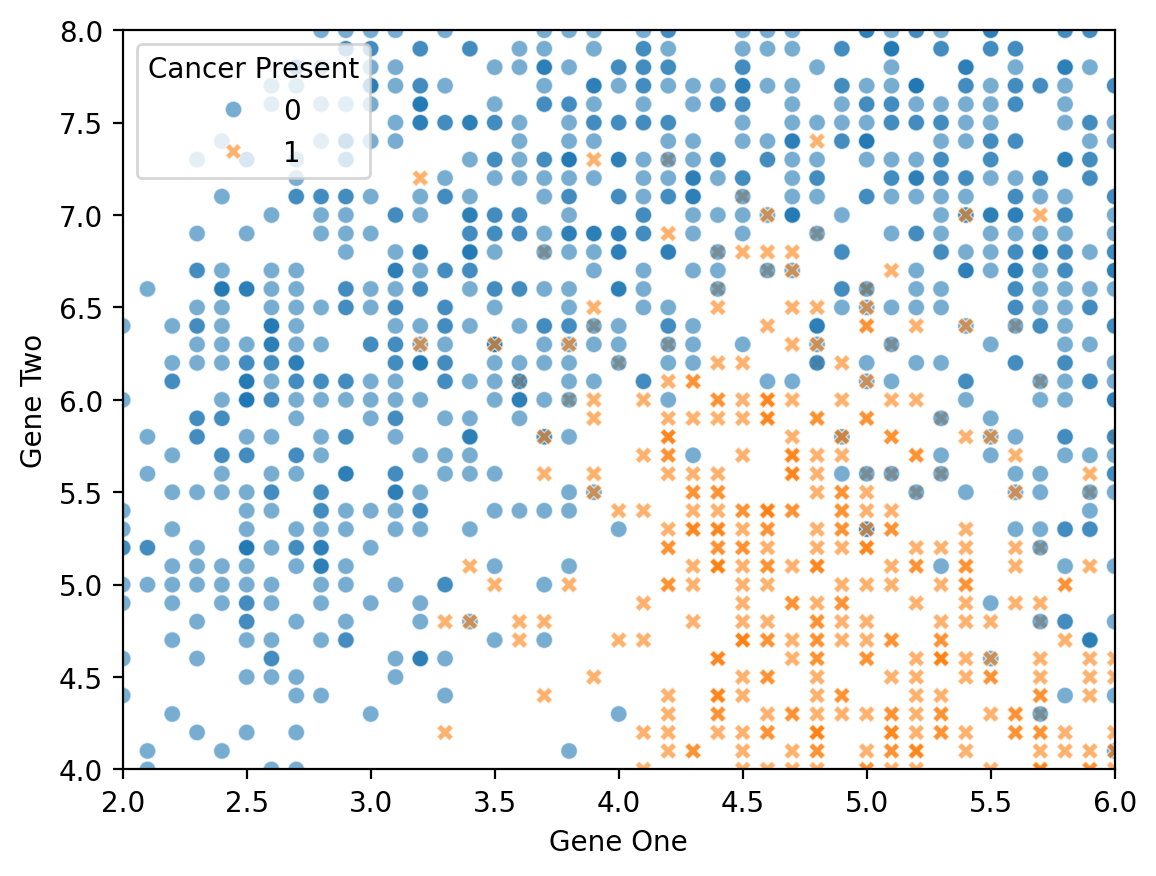

In [5]:
sns.scatterplot(x = 'Gene One', y = 'Gene Two', hue = 'Cancer Present', data = data, alpha = 0.6, style = 'Cancer Present')
plt.xlim(2,6)
plt.ylim(4,8)

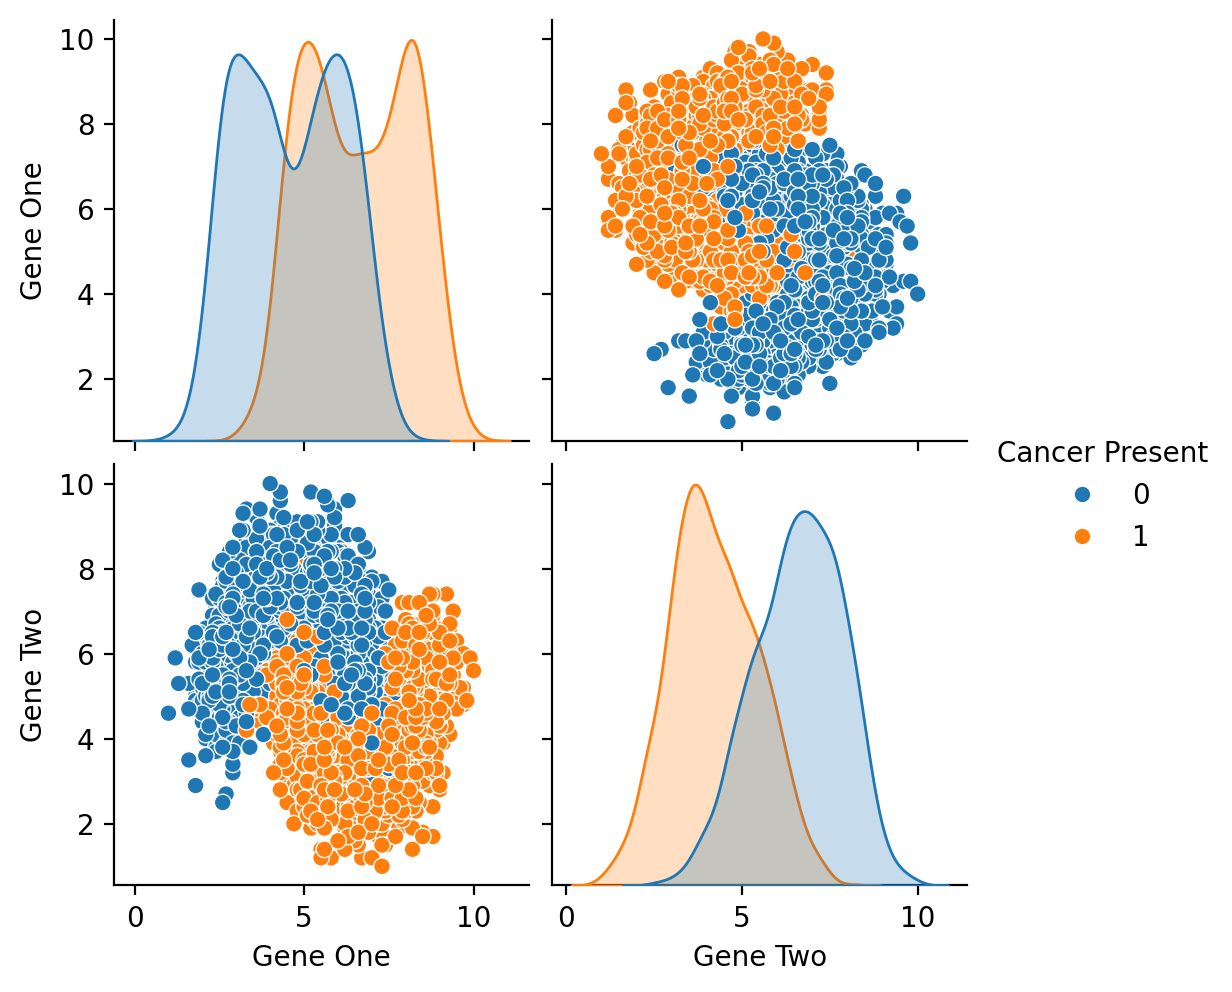

In [6]:
sns.pairplot(data, hue = 'Cancer Present')

In [7]:
X = data.drop('Cancer Present', axis = 1)

In [8]:
y = data['Cancer Present']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
scaler = StandardScaler()

In [11]:
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [12]:
knn_model = KNeighborsClassifier(n_neighbors = 1)

In [13]:
knn_model.fit(scaled_x_train, y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:
y_pred = knn_model.predict(scaled_x_test)

In [15]:
y_pred[:100]

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0])

In [94]:
def plot_metrics(model, x_test, y_test):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, cmap = 'Blues', ax = axes[0])
    RocCurveDisplay.from_estimator(model, x_test, y_test, ax = axes[1])
    PrecisionRecallDisplay.from_estimator(model, x_test, y_test, ax = axes[2])
    axes[0].set_title("Confusion Matrix")
    axes[1].set_title("ROC Curve")
    axes[2].set_title("Precision-Recall Curve")
    plt.tight_layout()
    plt.show()

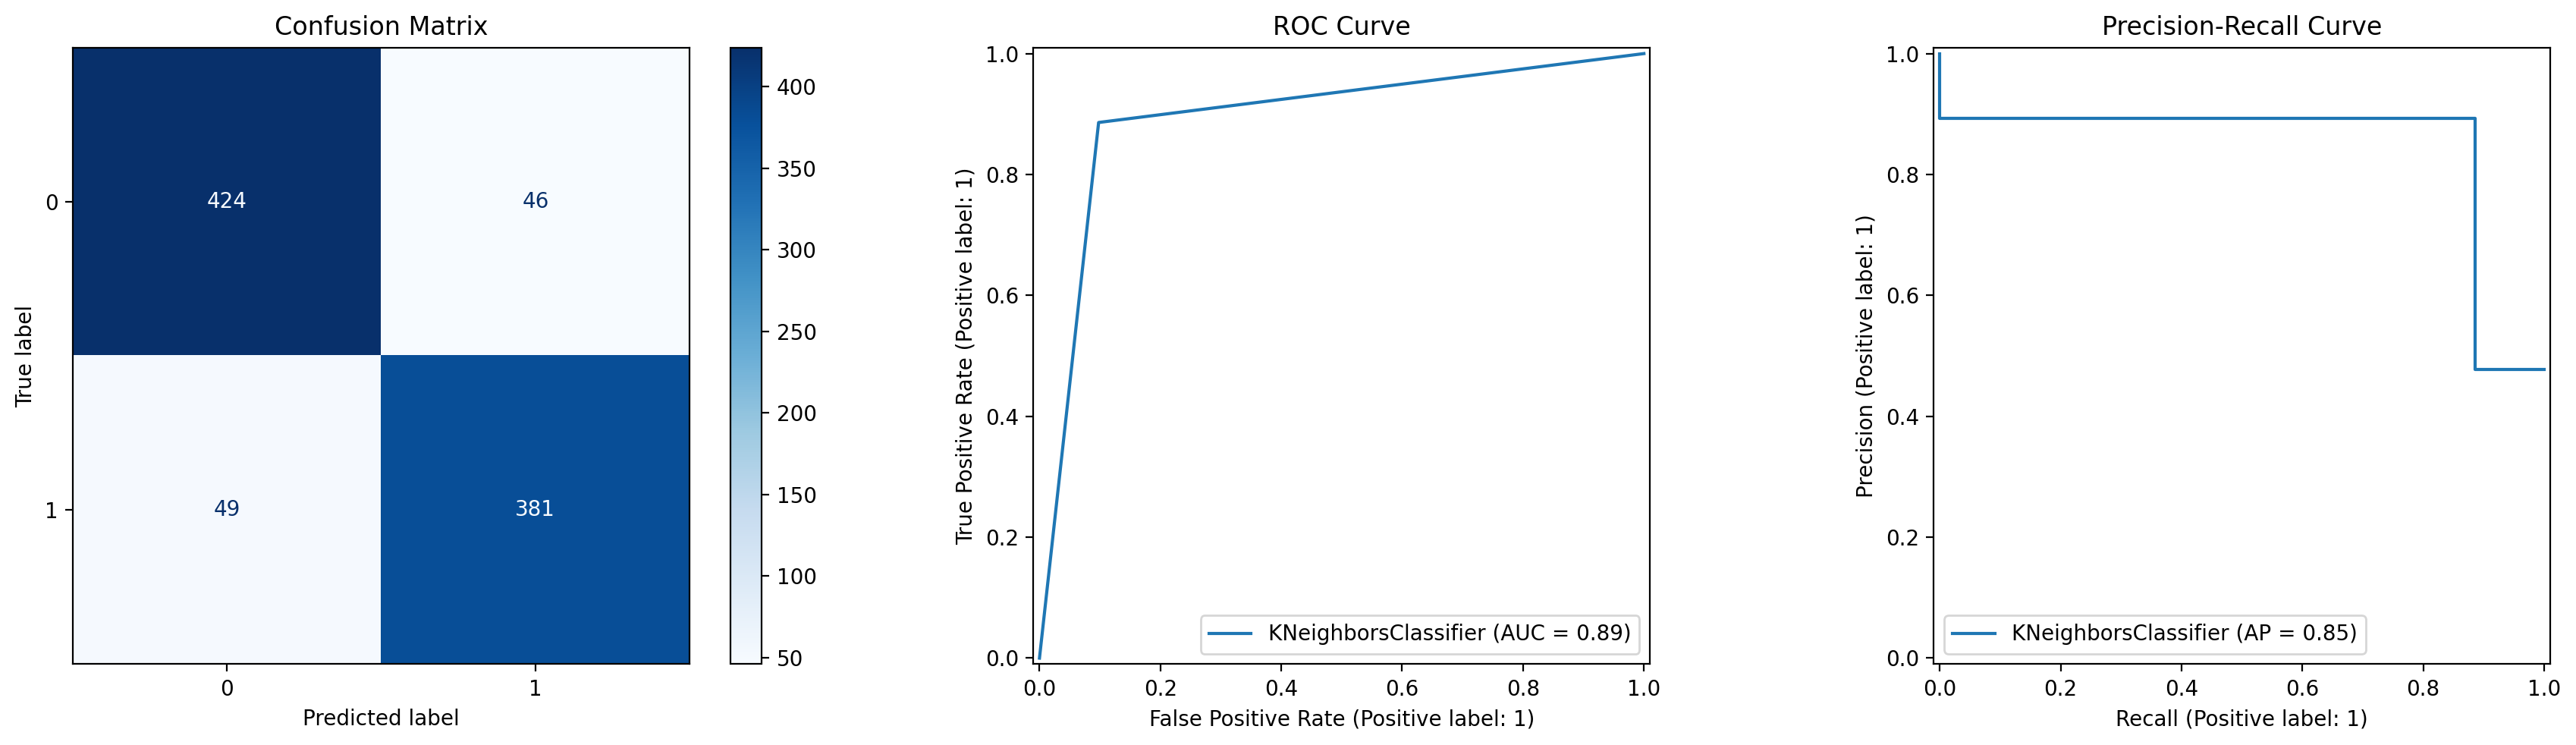

In [22]:
plot_metrics(knn_model, scaled_x_test, y_test)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       470
           1       0.89      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [39]:
def plot_confusion(k):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(scaled_x_train, y_train)
    y_pred = knn.predict(scaled_x_test)

    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix (k = {k})")
    plt.show()

# === Ползунок ===
interact(plot_confusion, k=IntSlider(min=1, max=100, step=1, value=5))

interactive(children=(IntSlider(value=5, description='k', min=1), Output()), _dom_classes=('widget-interact',)…

<function __main__.plot_confusion(k)>

In [79]:
test_error_rates = [ ]

In [80]:
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(scaled_x_train, y_train)
    y_pred = knn.predict(scaled_x_test)

    errors = 1 - accuracy_score(y_test, y_pred)
    test_error_rates.append(errors)

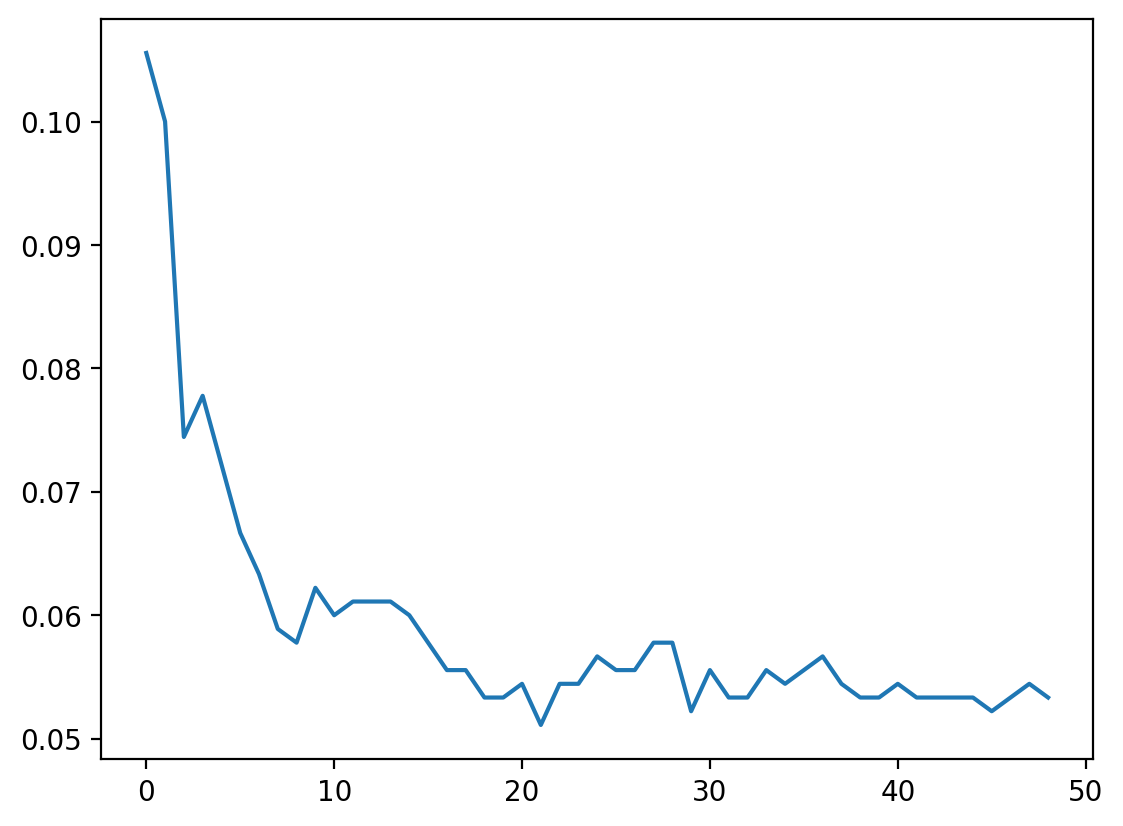

In [81]:
plt.plot(test_error_rates)

In [58]:
np.min(test_error_rates)

np.float64(0.05111111111111111)

(0.0, 0.11)

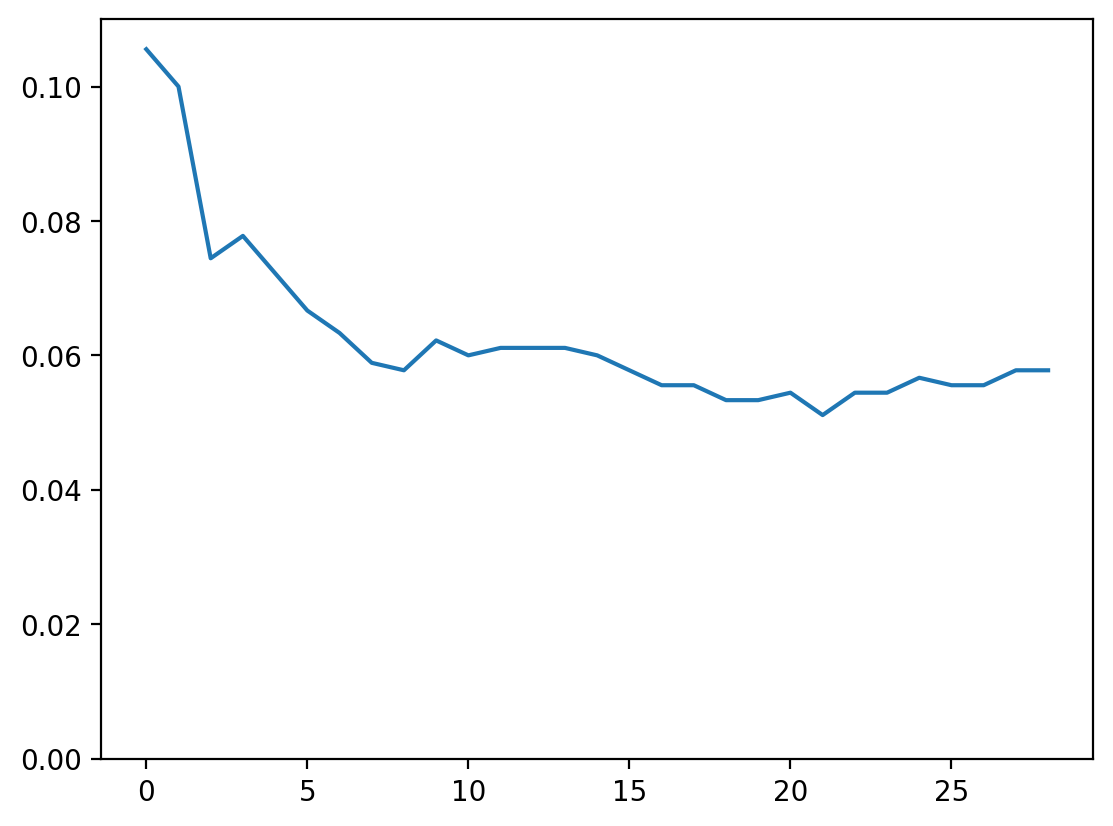

In [60]:
plt.plot(test_error_rates)
plt.ylim(0, 0.11)

In [61]:
scaler = StandardScaler()

In [62]:
knns = KNeighborsClassifier()

In [63]:
knns.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [66]:
operations = [('scaler', scaler), ('knns', knns), ]

In [67]:
pipeline = Pipeline (operations)

In [68]:
k_values = list(range(1, 100))

In [69]:
parameter_grid = {'knns__n_neighbors': k_values}

In [70]:
grid_model = GridSearchCV(pipeline, parameter_grid, cv = 10, scoring = 'accuracy')

In [71]:
grid_model.fit(X_train, y_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'knns__n_neighbors': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [74]:
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knns', KNeighborsClassifier(n_neighbors=44))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knns': KNeighborsClassifier(n_neighbors=44),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knns__algorithm': 'auto',
 'knns__leaf_size': 30,
 'knns__metric': 'minkowski',
 'knns__metric_params': None,
 'knns__n_jobs': None,
 'knns__n_neighbors': 44,
 'knns__p': 2,
 'knns__weights': 'uniform'}

In [83]:
full_pred = grid_model.predict(X_test)

In [85]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.94      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



In [91]:
new_patient = [[3.8, 6.4]]

In [92]:
grid_model.predict(scaler.transform(new_patient))

/Users/konansul/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [93]:
grid_model.predict_proba(new_patient)

/Users/konansul/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.88636364, 0.11363636]])